# Flights
For the Communicate Data Findings Project I choose the Flights dataset. This dataset reports flights in the United States including airline carrier, departure time, plain tail number, delays and cancellations. 

The datasets are organized by year from 1987 to 2008 and I originally planned to merge all 10 datasets togehter, but after discovering each dataset had over 7mm records I decided to limit the analysis to the year 2008.

I'll start off the exploratory data analysis by importing some libraries and the dataset followed by some basic exploratory data analysis to get a feel for the data prior to looking at some visualizations.


##### import data sets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')

pd.options.display.max_columns = 50

As a reference point lets include the column definitions so we dont need to keep referring back to the website

|#|Name|Description|
|---|---|---|
|1|Year|1987-2008|
|2|Month|43477|
|3|DayofMonth|43496|
|4|DayOfWeek|1 (Monday) - 7 (Sunday)|
|5|DepTime|actual departure time (local, hhmm)|
|6|CRSDepTime|scheduled departure time (local, hhmm)|
|7|ArrTime|actual arrival time (local, hhmm)|
|8|CRSArrTime|scheduled arrival time (local, hhmm)|
|9|UniqueCarrier|unique carrier code|
|10|FlightNum|flight number|
|11|TailNum|plane tail number|
|12|ActualElapsedTime|in minutes|
|13|CRSElapsedTime|in minutes|
|14|AirTime|in minutes|
|15|ArrDelay|arrival delay, in minutes|
|16|DepDelay|departure delay, in minutes|
|17|Origin|origin IATA airport code|
|18|Dest|destination IATA airport code|
|19|Distance|in miles|
|20|TaxiIn|taxi in time, in minutes|
|21|TaxiOut|taxi out time in minutes|
|22|Cancelled|was the flight cancelled?|
|23|CancellationCode|reason for cancellation (A = carrier, B = weather, C = NAS, D = security)|
|24|Diverted|1 = yes, 0 = no|
|25|CarrierDelay|in minutes|
|26|WeatherDelay|in minutes|
|27|NASDelay|in minutes|
|28|SecurityDelay|in minutes|
|29|LateAircraftDelay|in minutes|

### Merge dataframes & rename columns to distinguish originating and destination airports

In [2]:
df = pd.read_csv(r'D:\\Reference\\Udacity\\Section5\\2008.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB


In [4]:
df_airlines = pd.read_csv(r'D:\\Reference\\Udacity\\Section5\\carriers.csv')
df_airports = pd.read_csv(r'D:\\Reference\\Udacity\\Section5\\airports.csv')

In [5]:
df_airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491 entries, 0 to 1490
Data columns (total 2 columns):
Code        1490 non-null object
Airlines    1491 non-null object
dtypes: object(2)
memory usage: 23.4+ KB


In [6]:
df_airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 7 columns):
iata       3376 non-null object
airport    3376 non-null object
city       3364 non-null object
state      3364 non-null object
country    3376 non-null object
lat        3376 non-null float64
long       3376 non-null float64
dtypes: float64(2), object(5)
memory usage: 184.7+ KB


#### Merge Datasets

**Define** - I dont know the code associated with the UniqueCarrier and do not believe the final audience will easier. To make it easier on both of us I will add the Airline name to the main dataframe from the airlines dataframe

**Code**

In [7]:
df1 = pd.merge(df, df_airlines, left_on='UniqueCarrier', right_on= 'Code').drop('Code', axis=1)

**Test**

In [8]:
df1.shape

(7009728, 30)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7009728 entries, 0 to 7009727
Data columns (total 30 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
Airlines             object
dtypes: float64(14), int64(10), object(6)
m

**Define** The origin and destination airport name are a bit more familiar than the UniqueCarrier code but there are still a lot that I dont know, also it might be interesting to try to add a graph which shows where the airlines are flying in a out of and for that I anticipate we will need the longitude and latitude which we can obtain from the `airports` dataframe.

**Code**

In [10]:
# Tackling the Originating airport first
df2 = pd.merge(df1, df_airports, left_on='Origin', right_on= 'iata').drop('iata', axis=1)

**Test**

In [11]:
for i, v in enumerate(df2.columns):
    print(i, v)

0 Year
1 Month
2 DayofMonth
3 DayOfWeek
4 DepTime
5 CRSDepTime
6 ArrTime
7 CRSArrTime
8 UniqueCarrier
9 FlightNum
10 TailNum
11 ActualElapsedTime
12 CRSElapsedTime
13 AirTime
14 ArrDelay
15 DepDelay
16 Origin
17 Dest
18 Distance
19 TaxiIn
20 TaxiOut
21 Cancelled
22 CancellationCode
23 Diverted
24 CarrierDelay
25 WeatherDelay
26 NASDelay
27 SecurityDelay
28 LateAircraftDelay
29 Airlines
30 airport
31 city
32 state
33 country
34 lat
35 long


**Define** We'll be bringing in destination airport codes as well so we will need to rename the columns that we just merged into the main dataframe from the airports dataframe

**Code**

In [12]:
df2.rename(columns={'airport': 'orig_airport', 'city': 'orig_city', 'state':'orig_state', 'country':'orig_country', 'lat':'orig_lat', 'long':'orig_long'}, inplace=True)

**Test**

In [13]:
for i, v in enumerate(df2.columns):
    print(i,v)

0 Year
1 Month
2 DayofMonth
3 DayOfWeek
4 DepTime
5 CRSDepTime
6 ArrTime
7 CRSArrTime
8 UniqueCarrier
9 FlightNum
10 TailNum
11 ActualElapsedTime
12 CRSElapsedTime
13 AirTime
14 ArrDelay
15 DepDelay
16 Origin
17 Dest
18 Distance
19 TaxiIn
20 TaxiOut
21 Cancelled
22 CancellationCode
23 Diverted
24 CarrierDelay
25 WeatherDelay
26 NASDelay
27 SecurityDelay
28 LateAircraftDelay
29 Airlines
30 orig_airport
31 orig_city
32 orig_state
33 orig_country
34 orig_lat
35 orig_long


**Define** Repeat above for destination cities.

**Code**

In [14]:
df3 = pd.merge(df2, df_airports, left_on='Dest', right_on= 'iata').drop('iata', axis=1)

**Test**

In [15]:
for i, v in enumerate(df3.columns):
    print(i, v)

0 Year
1 Month
2 DayofMonth
3 DayOfWeek
4 DepTime
5 CRSDepTime
6 ArrTime
7 CRSArrTime
8 UniqueCarrier
9 FlightNum
10 TailNum
11 ActualElapsedTime
12 CRSElapsedTime
13 AirTime
14 ArrDelay
15 DepDelay
16 Origin
17 Dest
18 Distance
19 TaxiIn
20 TaxiOut
21 Cancelled
22 CancellationCode
23 Diverted
24 CarrierDelay
25 WeatherDelay
26 NASDelay
27 SecurityDelay
28 LateAircraftDelay
29 Airlines
30 orig_airport
31 orig_city
32 orig_state
33 orig_country
34 orig_lat
35 orig_long
36 airport
37 city
38 state
39 country
40 lat
41 long


**Define** again we need to distiguish between origination and distination cities so we will need to add a prefix of `dest_` to the new fields that we just added.

**Code**

In [16]:
df3.rename(columns={'airport': 'dest_airport', 'city': 'dest_city', 'state':'dest_state', 'country':'dest_country',
                    'lat':'dest_lat', 'long':'dest_long'}, inplace=True)

**Test**

In [17]:
for i, v in enumerate(df3.columns):
    print(i, v)

0 Year
1 Month
2 DayofMonth
3 DayOfWeek
4 DepTime
5 CRSDepTime
6 ArrTime
7 CRSArrTime
8 UniqueCarrier
9 FlightNum
10 TailNum
11 ActualElapsedTime
12 CRSElapsedTime
13 AirTime
14 ArrDelay
15 DepDelay
16 Origin
17 Dest
18 Distance
19 TaxiIn
20 TaxiOut
21 Cancelled
22 CancellationCode
23 Diverted
24 CarrierDelay
25 WeatherDelay
26 NASDelay
27 SecurityDelay
28 LateAircraftDelay
29 Airlines
30 orig_airport
31 orig_city
32 orig_state
33 orig_country
34 orig_lat
35 orig_long
36 dest_airport
37 dest_city
38 dest_state
39 dest_country
40 dest_lat
41 dest_long


**Define** There area lot a NaN's for the delay, let's fill those with Zeros

**Code**

In [18]:
df3['CarrierDelay'].fillna(value=0, inplace=True)
df3['WeatherDelay'].fillna(value=0, inplace=True)
df3['NASDelay'].fillna(value=0, inplace=True)
df3['SecurityDelay'].fillna(value=0, inplace=True)
df3['LateAircraftDelay'].fillna(value=0, inplace=True)
df3.head(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Airlines,orig_airport,orig_city,orig_state,orig_country,orig_lat,orig_long,dest_airport,dest_city,dest_state,dest_country,dest_lat,dest_long
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,Southwest Airlines Co.,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581,Tampa International,Tampa,FL,USA,27.975472,-82.53325
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,Southwest Airlines Co.,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581,Tampa International,Tampa,FL,USA,27.975472,-82.53325


#### Making some of columns more descriptive

The cancellation codes need a more friendly description, lets replace the codes with more user friendly descriptions. If we were going to apply machine learning we may need to apply onehotencoder but since were more interested in visualizations in  this project we will just add the user friendly descriptions.

Inspriration from [stackoverflow.com](https://stackoverflow.com/questions/23307301/replacing-column-values-in-a-pandas-dataframe)

In [19]:
df3['CancellationCode'] = df['CancellationCode'].map({'A': 'Carrier', 'B': 'Weather', 'C': 'NationalAirSystem', 'D': 'Security', 0: 'NotCancelled'})
df3['CancellationCode'].fillna(value= 'NotCancelled', inplace= True)
df3.head(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Airlines,orig_airport,orig_city,orig_state,orig_country,orig_lat,orig_long,dest_airport,dest_city,dest_state,dest_country,dest_lat,dest_long
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,NotCancelled,0,0.0,0.0,0.0,0.0,0.0,Southwest Airlines Co.,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581,Tampa International,Tampa,FL,USA,27.975472,-82.53325
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,NotCancelled,0,0.0,0.0,0.0,0.0,0.0,Southwest Airlines Co.,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581,Tampa International,Tampa,FL,USA,27.975472,-82.53325


#### Univariate Plots

**Frequency Plot** a relative frequency plot of the Airlines making the most flights, sorted from most frequent to least.

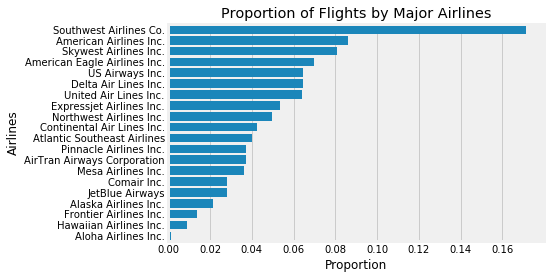

In [20]:
airline_counts = df3['Airlines'].value_counts()
airline_order = airline_counts.index

#compute proportion
flights = len(df3['Year'])
max_airline_count = airline_counts[0]
max_prop = max_airline_count / flights

# establish tick locations and create a plot
base_color= sns.color_palette()[0]
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

sns.countplot(data= df3, y='Airlines', color= base_color, order= airline_order)
plt.xticks(tick_props * flights, tick_names)
plt.xlabel('Proportion')
plt.title("Proportion of Flights by Major Airlines");

## sns.countplot(data= df, y='Airlines', color= base_color, order= airline_order)

In [21]:
#### Where do most of SouthWest's Flights travel to and 

#### Which month has the most flights?

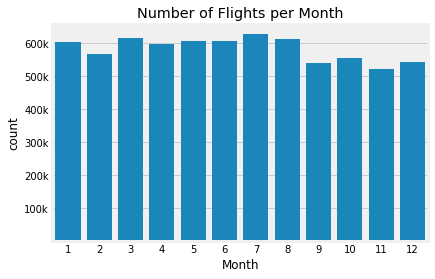

In [22]:
base_color=sns.color_palette()[0]
sns.countplot(data=df3, x='Month', color=base_color);
plt.yticks([1e5, 2e5, 3e5, 4e5, 5e5, 6e5], ['100k', '200k', '300k', '400k', '500k', '600k']);
plt.title('Number of Flights per Month');

#### Which date of the week has the most flights?

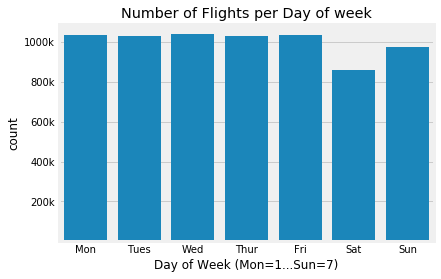

In [23]:
base_color=sns.color_palette()[0]
sns.countplot(data=df3, x='DayOfWeek', color=base_color);
plt.yticks([2e5, 4e5, 6e5, 8e5, 1e6], ['200k', '400k', '600k', '800k', '1000k']);
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
plt.title('Number of Flights per Day of week');
plt.xlabel('Day of Week (Mon=1...Sun=7)');

In [24]:
for i, v in enumerate(df3):
    print(i, v)

0 Year
1 Month
2 DayofMonth
3 DayOfWeek
4 DepTime
5 CRSDepTime
6 ArrTime
7 CRSArrTime
8 UniqueCarrier
9 FlightNum
10 TailNum
11 ActualElapsedTime
12 CRSElapsedTime
13 AirTime
14 ArrDelay
15 DepDelay
16 Origin
17 Dest
18 Distance
19 TaxiIn
20 TaxiOut
21 Cancelled
22 CancellationCode
23 Diverted
24 CarrierDelay
25 WeatherDelay
26 NASDelay
27 SecurityDelay
28 LateAircraftDelay
29 Airlines
30 orig_airport
31 orig_city
32 orig_state
33 orig_country
34 orig_lat
35 orig_long
36 dest_airport
37 dest_city
38 dest_state
39 dest_country
40 dest_lat
41 dest_long


### Find out where southwest is flying out of and into?

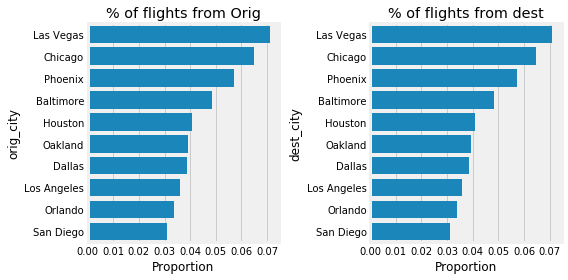

In [25]:
#create dataframe to isolate south West
southwest = df3.query('Airlines == "Southwest Airlines Co."')
plt.figure(figsize=[8,4])

plt.subplot(1,2,1)
sw_counts = southwest['orig_city'].value_counts().nlargest(10)
sw_order = sw_counts.index

#compute proportion
sw_flights = len(southwest['Year'])
sw_max_airline_count = sw_counts[0]
sw_max_prop = sw_max_airline_count / sw_flights

# establish tick locations and create a plot
base_color= sns.color_palette()[0]
sw_tick_props = np.arange(0, sw_max_prop, 0.01)
sw_tick_names = ['{:0.2f}'.format(v) for v in sw_tick_props]

sns.countplot(data= southwest, y='orig_city', color= base_color, order= sw_order)
plt.xticks(sw_tick_props* sw_flights, sw_tick_names)
plt.xlabel('Proportion')
plt.title("% of flights from Orig");

plt.subplot(1,2,2)
swd_counts = southwest['orig_city'].value_counts().nlargest(10)
swd_order = swd_counts.index

#compute proportion
swd_flights = len(southwest['Year'])
swd_max_airline_count = swd_counts[0]
swd_max_prop = swd_max_airline_count / swd_flights

# establish tick locations and create a plot
base_color= sns.color_palette()[0]
swd_tick_props = np.arange(0, swd_max_prop, 0.01)
swd_tick_names = ['{:0.2f}'.format(v) for v in swd_tick_props]

sns.countplot(data= southwest, y='dest_city', color= base_color, order= swd_order)
plt.xticks(swd_tick_props* swd_flights, swd_tick_names)
plt.xlabel('Proportion')
plt.title("% of flights from dest");

plt.tight_layout()

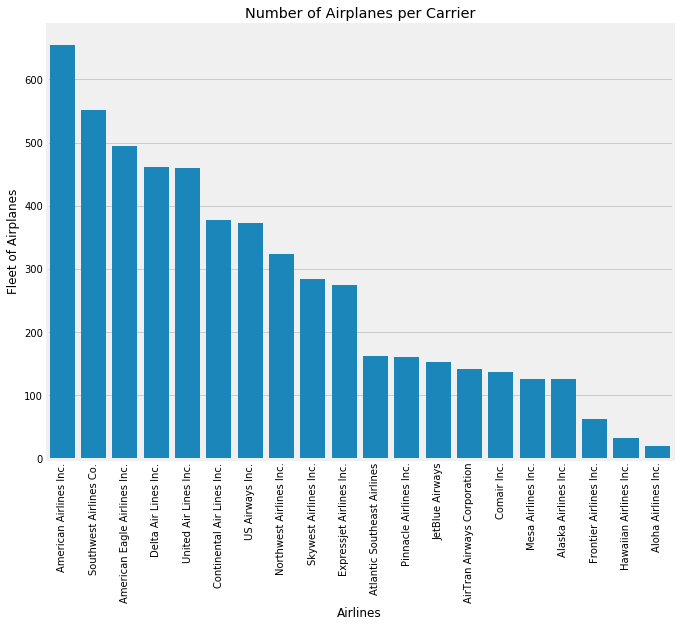

In [48]:
airline_planes = df3.groupby(['Airlines', 'TailNum']).size().reset_index().rename(columns={0:'count'})
airline_planes.head()

airline_counts = airline_planes['Airlines'].value_counts()
airline_order = airline_counts.index

plt.figure(figsize=[10,8])
base_color= sns.color_palette()[0]
sns.countplot(data= airline_planes, x='Airlines', color=base_color, order=airline_order);
plt.xticks(rotation=90);
plt.ylabel("Fleet of Airplanes")
plt.title("Number of Airplanes per Carrier");

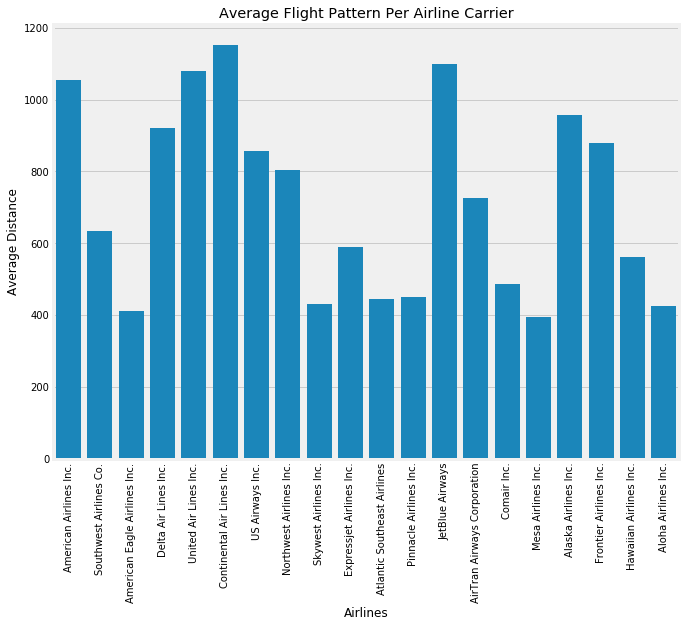

In [49]:
avg_distance = df3.groupby(['Airlines'])['Distance'].mean().reset_index().rename(columns={0:'mean_distance'})

plt.figure(figsize=[10,8])
base_color= sns.color_palette()[0]
sns.barplot(data= avg_distance, x='Airlines', y='Distance', color=base_color, order=airline_order);
plt.xticks(rotation=90);
plt.ylabel("Average Distance")
plt.title("Average Flight Pattern Per Airline Carrier");

How many airplanes does each airline operate and what is the average distance that they travel?

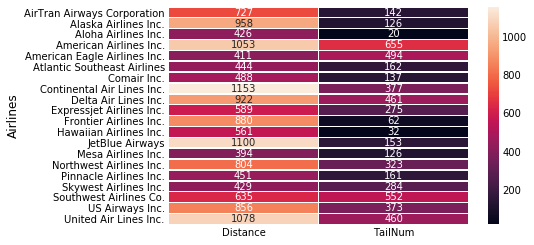

In [51]:
flights = df3.pivot_table(index='Airlines', aggfunc={'TailNum':'nunique', 'Distance':'mean'})

ax = sns.heatmap(flights, annot=True,  linewidths=.5,fmt='.0f');

### Feature Engineering

Hmm...dont know that the above graph is telling me what im really interested in obtaining. What id really like to find out is which origination and destiation is the most crowded? To do this im going to apply some feature engineering to combine the origination and destination of the flights, with some inspiration coming from [stackoverflow](https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-dataframe-in-pandas-python)

**Define** Combine Origin and Destination Airports

**Code**

In [26]:
df3['flight_pattern'] = df3['Origin'].map(str) + '-' + df3['Dest']

In [27]:
df3['flight_pattern_city'] = df3['orig_airport'].map(str) + '-' + df3['dest_airport']

**Test**

In [28]:
df3.head(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Airlines,orig_airport,orig_city,orig_state,orig_country,orig_lat,orig_long,dest_airport,dest_city,dest_state,dest_country,dest_lat,dest_long,flight_pattern,flight_pattern_city
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,NotCancelled,0,0.0,0.0,0.0,0.0,0.0,Southwest Airlines Co.,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581,Tampa International,Tampa,FL,USA,27.975472,-82.53325,IAD-TPA,Washington Dulles International-Tampa Internat...
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,NotCancelled,0,0.0,0.0,0.0,0.0,0.0,Southwest Airlines Co.,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581,Tampa International,Tampa,FL,USA,27.975472,-82.53325,IAD-TPA,Washington Dulles International-Tampa Internat...


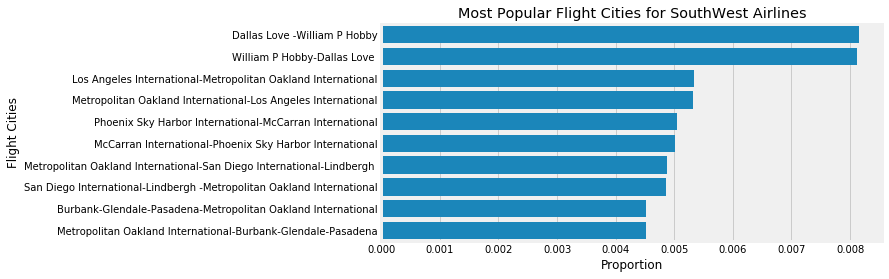

In [29]:
#create dataframe to isolate south West
southwest = df3.query('Airlines == "Southwest Airlines Co."')
plt.figure(figsize=[8,4])

sw_flight_city_counts = southwest['flight_pattern_city'].value_counts().nlargest(10)
sw_flight_city_order = sw_flight_city_counts.index

#compute proportion
sw_flight_city_flights = len(southwest['Year'])
sw_flight_city_max_airline_count = sw_flight_city_counts[0]
sw_flight_city_max_prop = sw_flight_city_max_airline_count / sw_flight_city_flights

# establish tick locations and create a plot
base_color= sns.color_palette()[0]
sw_flight_city_tick_props = np.arange(0, sw_flight_city_max_prop, 0.001)
sw_flight_city_tick_names = ['{:0.3f}'.format(v) for v in sw_flight_city_tick_props]

sns.countplot(data= southwest, y='flight_pattern_city', color= base_color, order= sw_flight_city_order)
plt.xticks(sw_flight_city_tick_props* sw_flight_city_flights, sw_flight_city_tick_names)
plt.ylabel('Flight Cities')
plt.xlabel('Proportion')
plt.title('Most Popular Flight Cities for SouthWest Airlines');

### MultiVariate

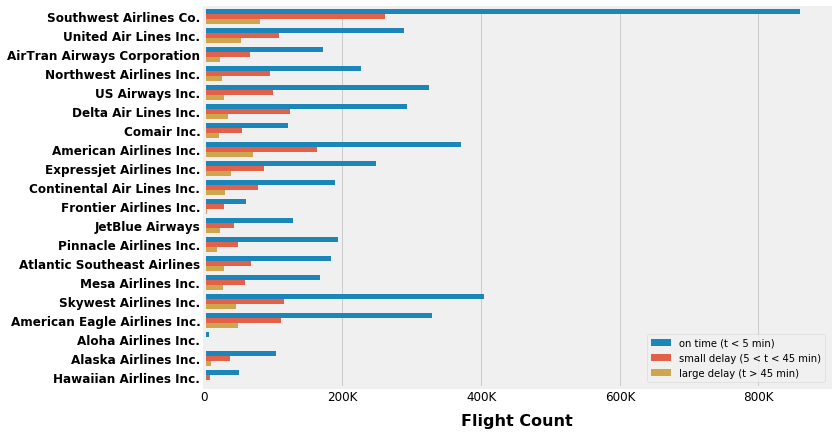

In [30]:
# https://www.kaggle.com/fabiendaniel/predicting-flight-delays-tutorial/notebook

#-------------------------------------------------------------------------------
# Function that defines how delays are grouped
delay_type = lambda x: ((0,1)[x>5],2)[x>45]
df3['delay_level'] = df3['ArrDelay'].apply(delay_type)
#-------------------------------------------------------------------------------
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y='Airlines', hue= 'delay_level', data= df3)
#-------------------------------------------------------------------------------

# We replace the a
#abbr_companies = df_airlines.set_index('Code')['Airlines'].to_dict()

#labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
#ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight Count', fontsize=16, weight = 'bold', labelpad=10)
plt.xticks([0, 2e5, 4e5, 6e5, 8e5], ['0', '200K', '400K', '600K', '800K'])


#________________
# Set the legend
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

In [31]:
delay_arr = pd.DataFrame({'ArrDelay': df3.groupby('orig_airport')['ArrDelay'].mean().nlargest(10)}).reset_index()

In [32]:
delay_arr

,orig_airport,ArrDelay
0,Pueblo Memorial,74.000000
1,Nantucket Memorial,28.603819
2,North Bend Muni,26.381048
3,Jack McNamara,24.670949
4,Pierre Regional,23.800000
5,King Salmon,22.044643
6,Capital,21.950673
7,Telluride Regional,20.379085
8,Klamath Falls International,20.323770
9,Tompkins Cty,17.858333


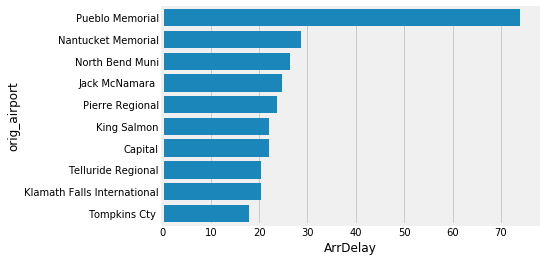

In [33]:
base_color= sns.color_palette()[0]
sns.barplot(data=delay_arr, y='orig_airport', x='ArrDelay', color=base_color, ci='sd');

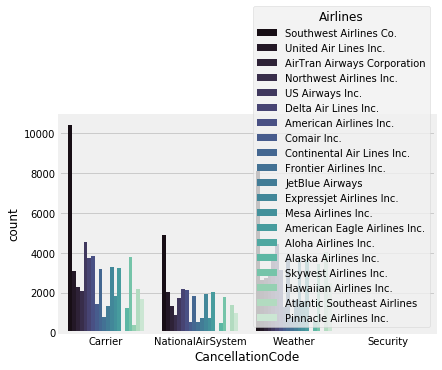

In [34]:
cancellations = df3.query('CancellationCode != "NotCancelled"')
sns.countplot(data=cancellations, x='CancellationCode', hue='Airlines', palette='mako')
ax.legend(loc=6, bbox_to_anchor=(0.6, 0., 10.5, 6.8))

### Airline vs. Distance Traveld Boxplot

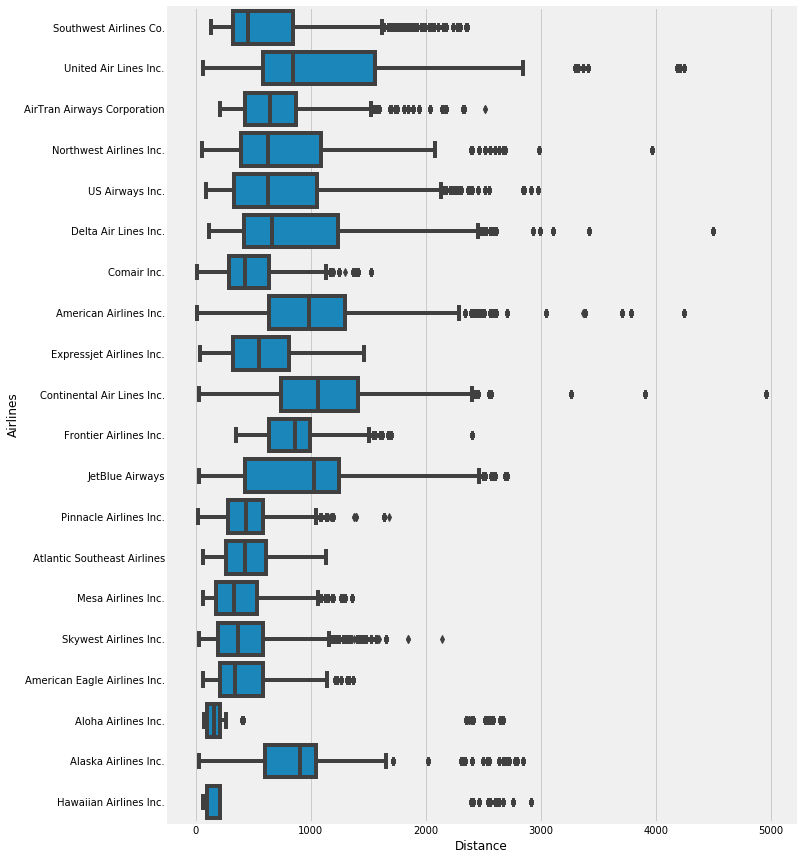

In [35]:
plt.figure(figsize=[10, 15])
sns.boxplot(data=df3, y='Airlines', x='Distance', color=base_color);
#plt.xticks(rotation=30)

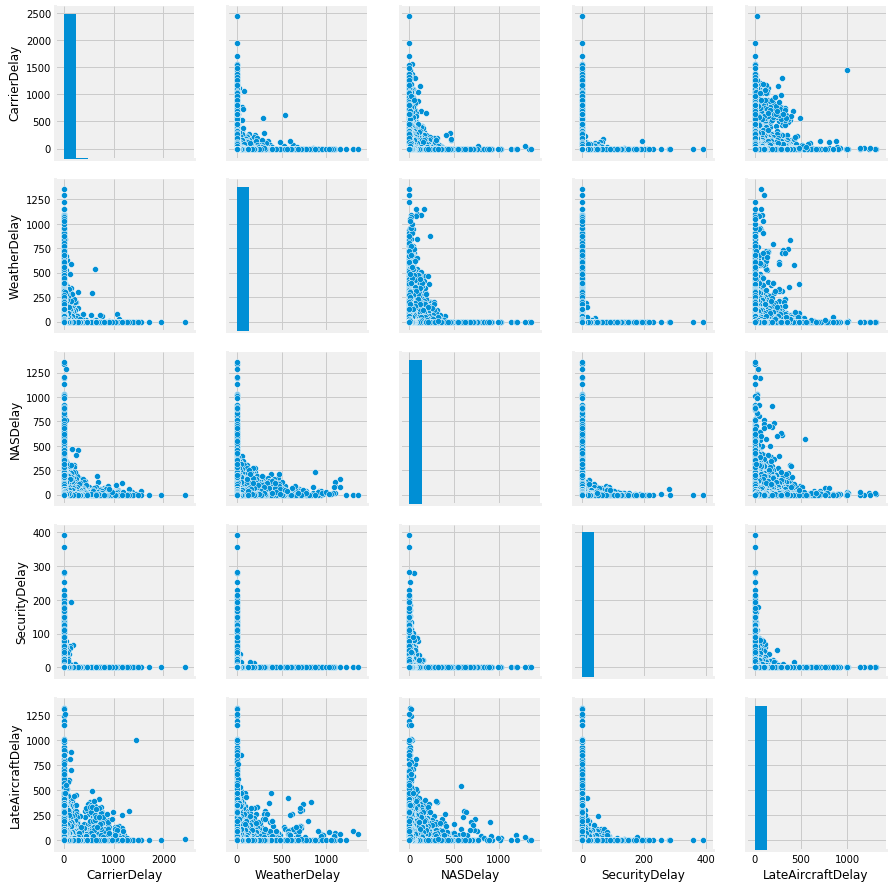

In [36]:
cols = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
sns.pairplot(df3[cols], size=2.5)

In [37]:
"""
plt.figure(figsize=[8,6])
g = sns.FacetGrid(data=df3, hue='orig_city', size=5, palette="magma");
g.map(plt.scatter, 'Airlines', 'ArrDelay');
g.add_legend();
plt.show
"""

'\nplt.figure(figsize=[8,6])\ng = sns.FacetGrid(data=df3, hue=\'orig_city\', size=5, palette="magma");\ng.map(plt.scatter, \'Airlines\', \'ArrDelay\');\ng.add_legend();\nplt.show\n'

In [38]:
### Ridgeline Plot

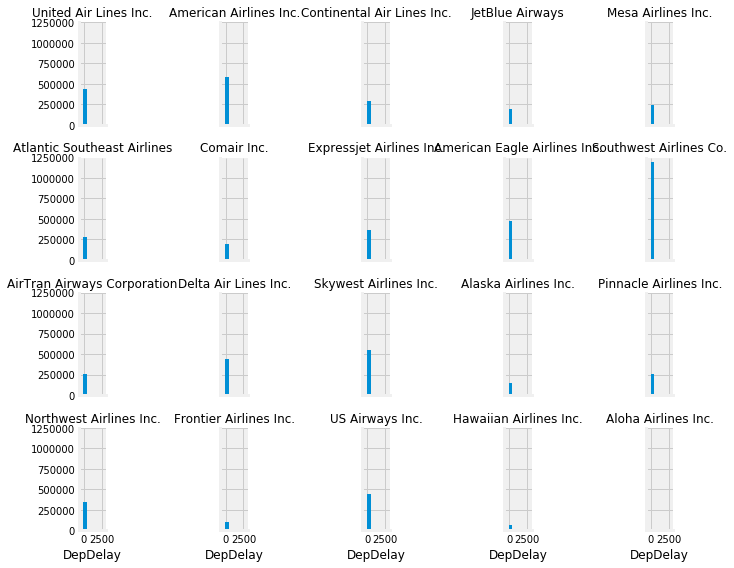

In [39]:
airline_means = df3.groupby('Airlines').mean()
airline_order = airline_means.sort_values('DepDelay', ascending=False).index
bins = np.arange(df3['DepDelay'].min(), df3['DepDelay'].max()+500, 500)

g = sns.FacetGrid(data=df3, col='Airlines', col_wrap=5, size=2,
                 col_order = airline_order)
g.map(plt.hist, 'DepDelay', bins=bins)
g.set_titles('{col_name}')

D:\PROGRAMS\Anaconda\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
D:\PROGRAMS\Anaconda\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
D:\PROGRAMS\Anaconda\lib\site-packages\numpy\lib\function_base.py:991: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


Text(0,0.5,'Avg Delay Times')

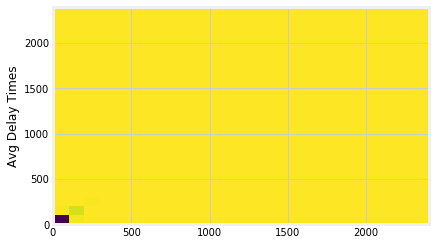

In [40]:
bins_x = np.arange(0, df3['ArrDelay'].max(), 100)
bins_y = np.arange(0, df3['DepDelay'].max(), 100)
plt.hist2d(data=df3, x='ArrDelay', y='DepDelay', cmin=0,
           cmap='viridis_r', bins=[bins_x, bins_y]);
plt.ylabel('Avg Delay Times')

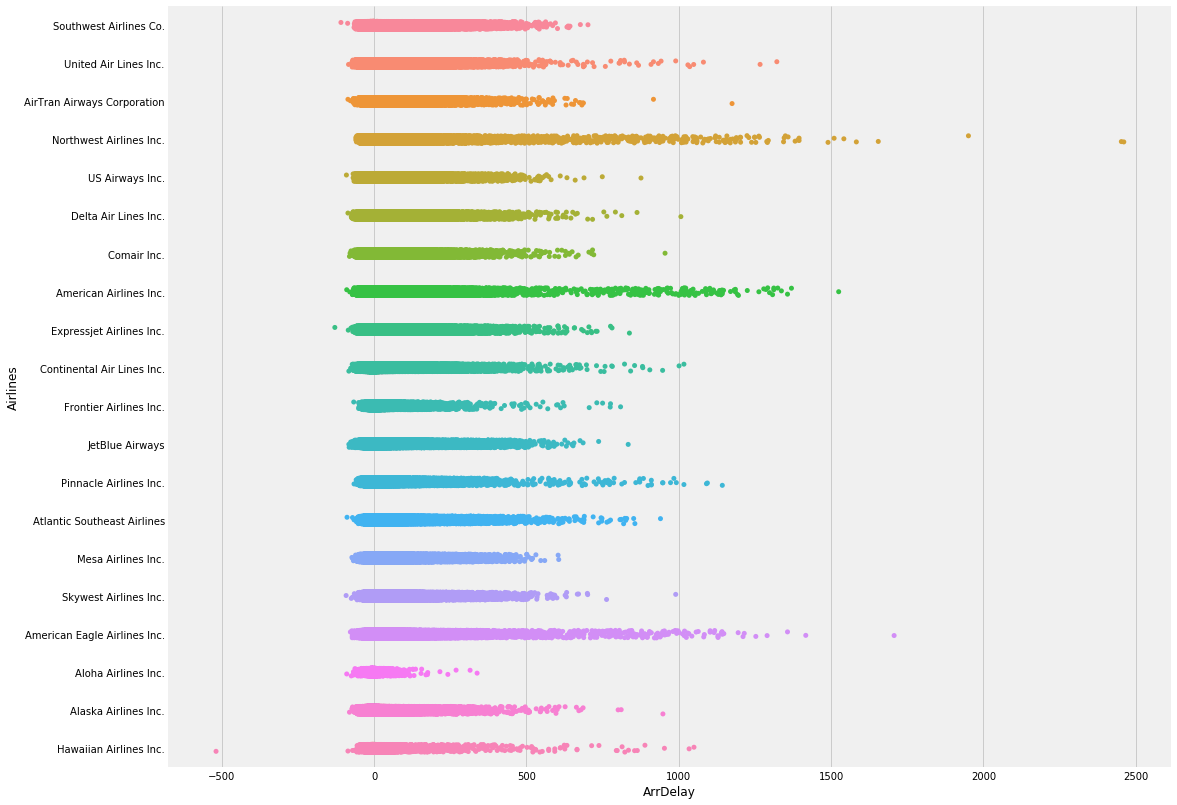

In [47]:
# initialize the figure
fig_dem = (16,14)
f, ax = plt.subplots(figsize = fig_dem)
sns.despine(bottom=True, left=True)

# show each observation with a scatterplot
sns.stripplot(x= 'ArrDelay', y='Airlines',
             data= df3, dodge=True, jitter= True);

### Considerations for cleaning dataset
1. **Done** - Airline Codes dont mean much to me, nor will it to the end reader, bring in the `Carrier Names`
2. **Done** - there are a lot of NaNs in the dataset when there are cancellations, consider stripping these from the dataset and creatng a new dataframe with them
3. **Done** `Cancellations` need to be more descriptive
4. **Done** - When there are no delays the last 5 columns are populated NaN, these need to be filled with ZEROS
 

### Plot ideas
#### Univariate:

2. Number of flights departing from the top 25/50 Cities
3. Number of cancellations by reason code
4. Number of different airlines in the dataset
5. Number of flights taking place based on day of the week
6. Cities with most delays by code
7. **Done** Where does Southwest fly out of and into the most?
8. **Done** Flight by month of the year

#### Bivariate:
1. Airline vs. Number of cancellations
2. Airline vs. the Number of delays (heatmap might be good or colored scatterplot)
3. Number of destinations the major 
4. Check to see if the number of airlines in expanding or contracting by year
5. Scatter plot of distance and airline 
6. Which airports are serviced by the most number of airlines?

#### MultiVariate:


#### Explanatory:
1. Need to grab a picture of an airline taking off off or landing

In [42]:
df.shape[0]

7009728

In [43]:
df.UniqueCarrier.nunique()

20